In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import json
import pandas as pd
from collections import defaultdict

from structure_functions import *

# Deactivate rdkit messages:
from rdkit import RDLogger   
RDLogger.DisableLog('rdApp.*')

# 0. Load dataset

In [2]:
# import dataset:
df = pd.read_csv(r"C:\FIA_GENERATION\05_final_dataset_49015\FIA_DATA_49015.csv")
df.shape

# filter dataset:
df = df[df["mol_type"] == "dataset"]

print(f'Compounds in Dataset: {len(df)}')

Compounds in Dataset: 44877


# 1. Analyze substructures of radius 1

### 1.1 Search for substructures

In [3]:
radius = 1

substructure_list = []

# write all substructures in list:
for index, row in df.iterrows():
    smiles = row['ligand_smiles'].split('.')
    for smi in smiles:
        substructure_list.extend(getSubSmilesRadN(Chem.MolFromSmiles(smi), radius))

# save substructure_list:
with open('substructures.json', 'w') as f:
    json.dump(substructure_list, f)

### 1.2 Draw substructures

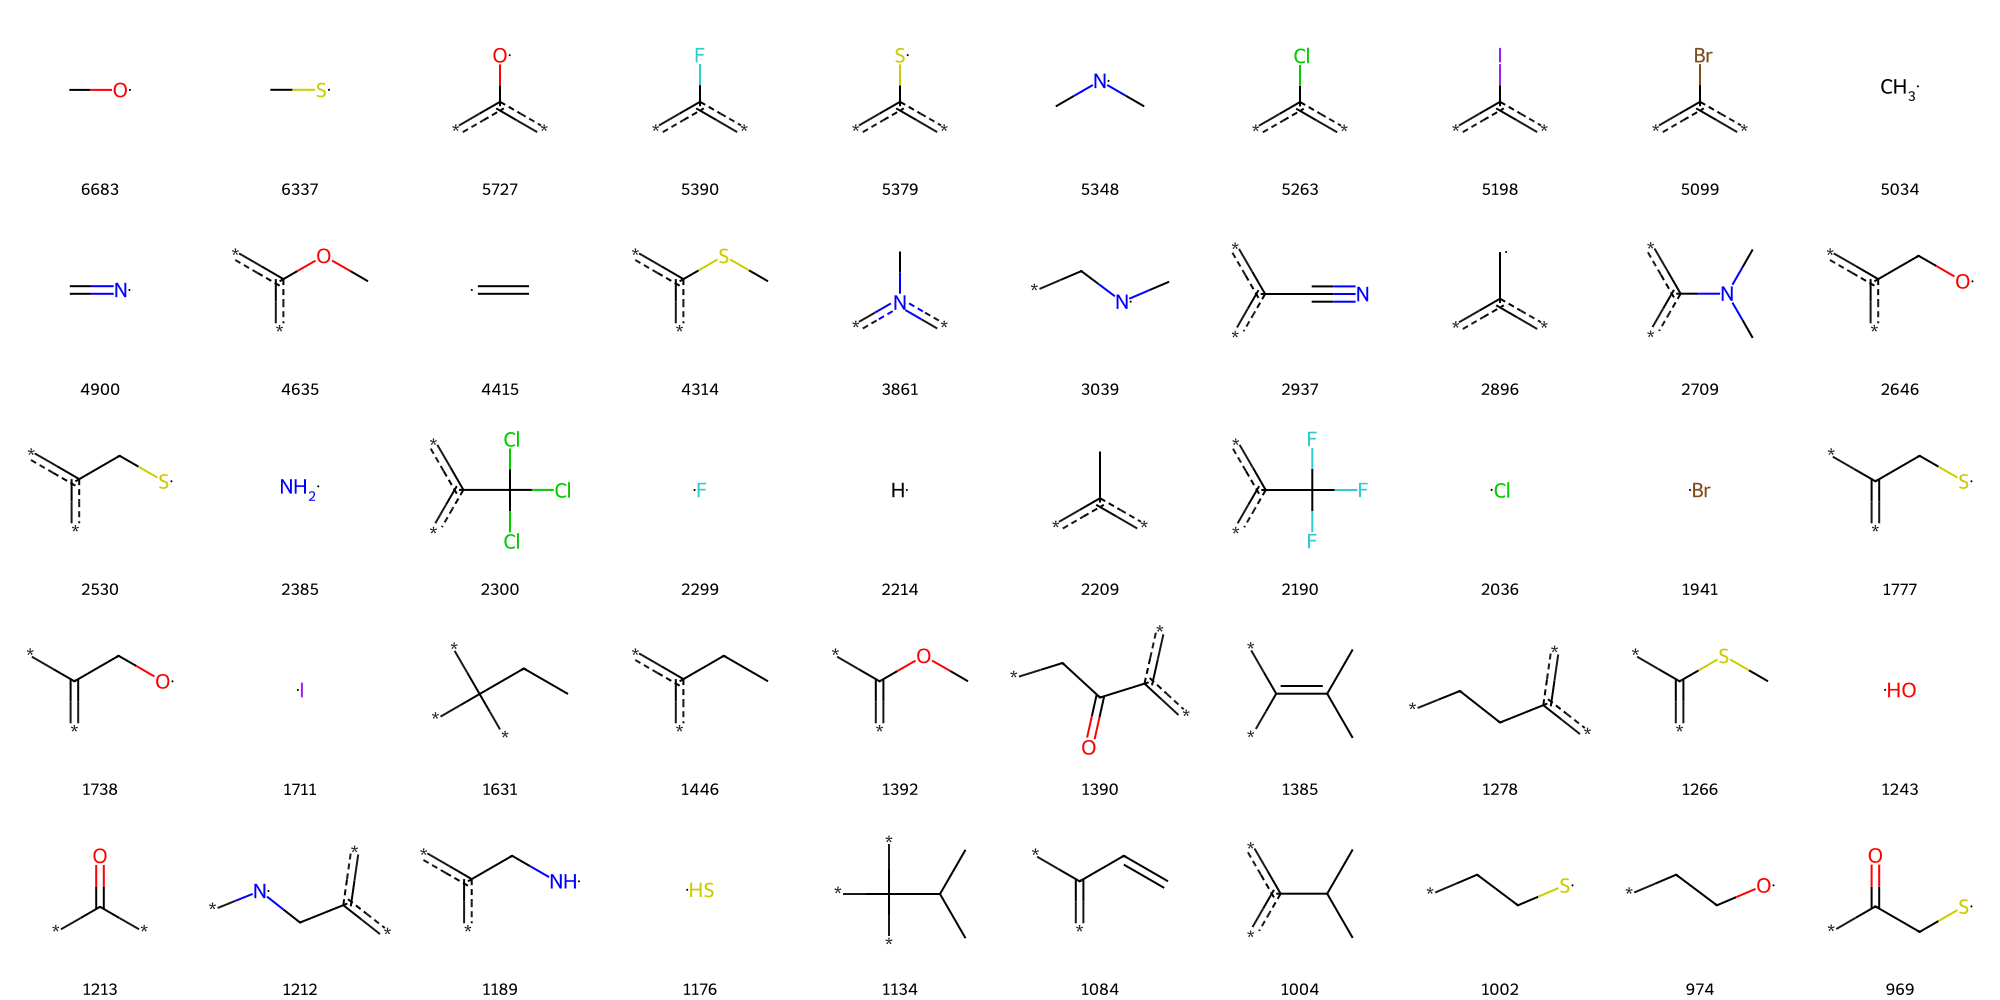

In [4]:
# load substructure_list:
with open('substructures.json', 'r') as f:
    substructure_list = json.load(f)

# count substructures:
substructure_counts = defaultdict(int)
for i in substructure_list:
    if i:
        substructure_counts[i] += 1

# sort substructure_counts by counts:
substructure_counts = dict(sorted(substructure_counts.items(), key=lambda item: item[1], reverse=True))

# draw substructures:
smiles = list(substructure_counts.keys())
counts = [str(x) for x in substructure_counts.values()]
mols = [Chem.MolFromSmiles(x) for x in smiles]

num_draw_compounds = 50
Chem.Draw.MolsToGridImage(mols[:num_draw_compounds], molsPerRow=10, legends=counts[:num_draw_compounds], useSVG=True, maxMols=num_draw_compounds)

# 2. Analyze ring systems

### 2.1 Search for ring systems

In [5]:
ringsystem_list = []

# write all ringsystems in list:
for index, row in df.iterrows():
    smiles = row['ligand_smiles'].split('.')
    for smi in smiles:
        ringsystem_list.extend(getRingSystemSmiles(Chem.MolFromSmiles(smi)))

# save ringsystem_list:
with open('ringsystem.json', 'w') as f:
    json.dump(ringsystem_list, f)

### 2.2 Draw ringsystems

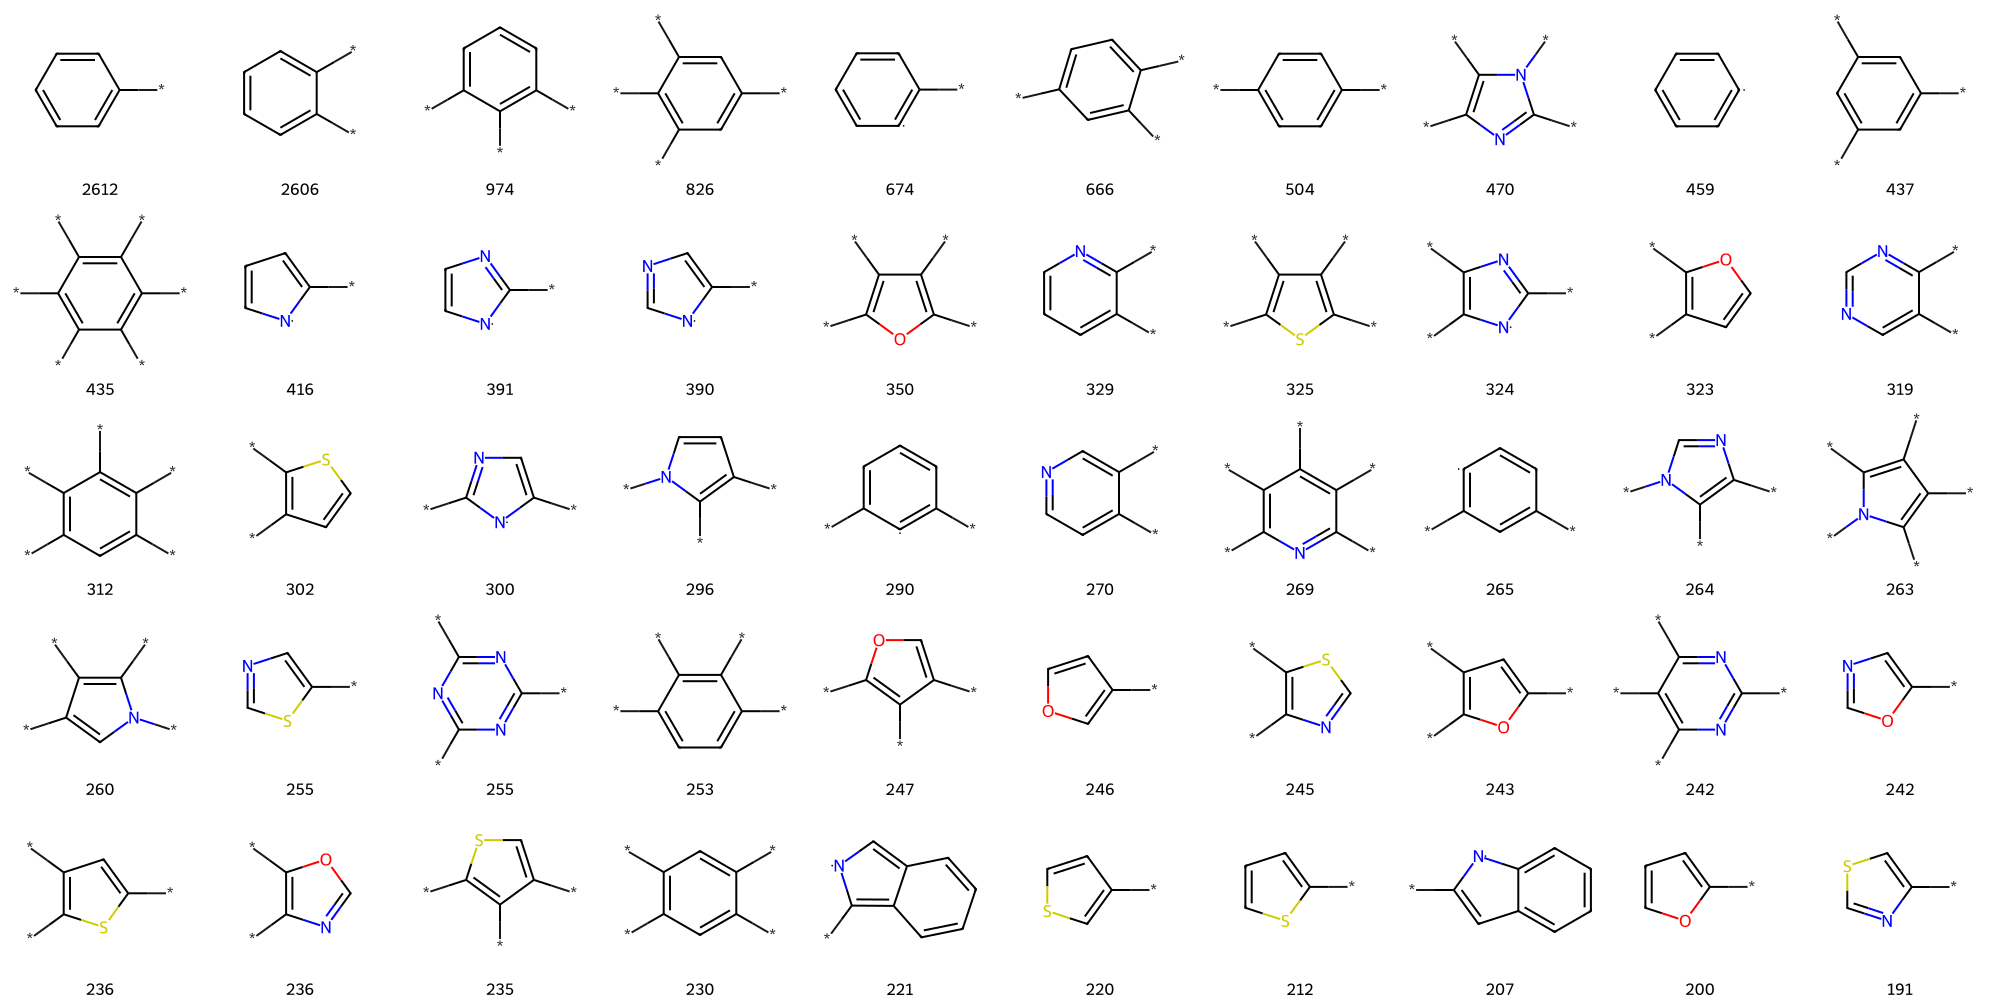

In [6]:
# load ringsystem_list:
with open('ringsystem.json', 'r') as f:
    ringsystem_list = json.load(f)

# count ringsystems:
ringsystem_counts = defaultdict(int)
for i in ringsystem_list:
    if i:
        ringsystem_counts[i] += 1

# sort ringsystem_counts by counts:
ringsystem_counts = dict(sorted(ringsystem_counts.items(), key=lambda item: item[1], reverse=True))

# draw ringsystems:
smiles = list(ringsystem_counts.keys())
counts = [str(x) for x in ringsystem_counts.values()]
mols = [Chem.MolFromSmiles(x) for x in smiles]

num_draw_compounds = 50
Chem.Draw.MolsToGridImage(mols[:num_draw_compounds], molsPerRow=10, legends=counts[:num_draw_compounds], useSVG=True, maxMols=num_draw_compounds)